In [22]:
#Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Files
labs = pd.read_csv('Datasets/labs.csv')
examination = pd.read_csv('Datasets/examination.csv')
demographic = pd.read_csv('Datasets/demographic.csv')
diet = pd.read_csv('Datasets/diet.csv')
questionnaire = pd.read_csv('Datasets/questionnaire.csv')
#medications = pd.read_csv('Datasets/medications.csv')

In [5]:
#Merge all datasets
df1 = pd.merge(labs, examination, how="left", on="SEQN")
df2 = pd.merge(df1, demographic, how="left", on="SEQN")
df3 = pd.merge(df2, diet, how="left", on="SEQN")
nahnes_merged_dataset = pd.merge(df3, questionnaire, how="left", on="SEQN")

nahnes_merged_dataset.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [6]:
#Locate necessary columns for modeling
nahnes_dataset = nahnes_merged_dataset.loc[:,['SEQN', 'RIAGENDR', 'RIDAGEYR','DR1TCAFF', 'DR1TALCO', 'BMXWT', 'BMXHT', 
                                              'BPXPULS','BPXSY1', 'LBDHDD', 'ALQ130', 'SMQ040']]

nahnes_dataset.head()

,SEQN,RIAGENDR,RIDAGEYR,DR1TCAFF,DR1TALCO,BMXWT,BMXHT,BPXPULS,BPXSY1,LBDHDD,ALQ130,SMQ040
0,73557,1,69,203.0,0.0,78.3,171.3,1.0,122.0,65.0,1.0,3.0
1,73558,1,54,240.0,119.0,89.5,176.8,1.0,156.0,50.0,4.0,2.0
2,73559,1,72,45.0,0.0,88.9,175.3,1.0,140.0,60.0,NaN,3.0
3,73560,1,9,0.0,0.0,32.2,137.3,1.0,108.0,61.0,NaN,NaN
4,73561,2,73,24.0,0.0,52.0,162.4,1.0,136.0,85.0,NaN,NaN


In [7]:
#Rename columns
nahnes_renamed = nahnes_dataset.rename(columns={'SEQN':'ID',
                                      'RIAGENDR':'Gender',
                                      'RIDAGEYR':'Age',
                                      'DR1TCAFF':'Caffeine (mg)',
                                      'DR1TALCO':'Alcohol (gm)',
                                      'BMXWT':'Weight (kg)',
                                      'BMXHT':'Standing Height (cm)',
                                      'BPXPULS':'Pulse regular or irregular?',
                                      'BPXSY1':'Systolic: Blood pressure mm Hg',
                                      'LBDHDD': 'Direct HDL-Cholesterol (mg/dL)',
                                      'ALQ130':'Avg Drinks per Day',
                                      'SMQ040':'Smoker?'
                                      })

nahnes_renamed.head()

,ID,Gender,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Pulse regular or irregular?,Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL),Avg Drinks per Day,Smoker?
0,73557,1,69,203.0,0.0,78.3,171.3,1.0,122.0,65.0,1.0,3.0
1,73558,1,54,240.0,119.0,89.5,176.8,1.0,156.0,50.0,4.0,2.0
2,73559,1,72,45.0,0.0,88.9,175.3,1.0,140.0,60.0,NaN,3.0
3,73560,1,9,0.0,0.0,32.2,137.3,1.0,108.0,61.0,NaN,NaN
4,73561,2,73,24.0,0.0,52.0,162.4,1.0,136.0,85.0,NaN,NaN


In [13]:
nahnes_renamed.describe()

,ID,Gender,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Pulse regular or irregular?,Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL),Avg Drinks per Day,Smoker?
count,9813.000000,9813.000000,9813.000000,8531.000000,8531.000000,9723.000000,9067.000000,9511.000000,7172.000000,7624.000000,3596.000000,2490.000000
mean,78644.559971,1.507694,31.629573,93.338999,6.092814,62.599054,155.883759,1.013668,118.123536,53.105194,3.511123,2.143373
std,2938.592266,0.499966,24.397553,157.170984,22.535972,32.331616,23.176270,0.116116,18.078149,15.230838,28.866122,0.941396
min,73557.000000,1.000000,0.000000,0.000000,0.000000,3.100000,79.700000,1.000000,66.000000,10.000000,1.000000,1.000000
25%,76092.000000,1.000000,10.000000,0.000000,0.000000,37.950000,149.500000,1.000000,106.000000,42.000000,1.000000,1.000000
50%,78643.000000,2.000000,27.000000,25.000000,0.000000,65.300000,162.000000,1.000000,116.000000,51.000000,2.000000,3.000000
75%,81191.000000,2.000000,52.000000,130.000000,0.000000,83.500000,171.050000,1.000000,128.000000,61.000000,3.000000,3.000000
max,83731.000000,2.000000,80.000000,2448.000000,591.400000,222.600000,202.600000,2.000000,228.000000,173.000000,999.000000,3.000000


In [14]:
#Drop all NA values
nahnes_na = nahnes_renamed.dropna(axis=0, how='any')

In [15]:
nahnes_na.describe()

,ID,Gender,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Pulse regular or irregular?,Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL),Avg Drinks per Day,Smoker?
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,78599.497890,1.421941,47.350914,189.922644,19.078551,82.703586,169.404712,1.021800,122.644163,52.229958,3.890295,2.111814
std,2914.190606,0.494043,17.104100,220.790429,41.563626,20.935085,9.459327,0.146082,17.344827,16.828267,26.555836,0.939860
min,73557.000000,1.000000,18.000000,0.000000,0.000000,42.200000,142.500000,1.000000,66.000000,10.000000,1.000000,1.000000
25%,76168.500000,1.000000,33.000000,43.000000,0.000000,68.200000,162.600000,1.000000,112.000000,40.000000,1.000000,1.000000
50%,78530.500000,1.000000,47.000000,144.000000,0.000000,79.700000,169.500000,1.000000,120.000000,49.000000,2.000000,3.000000
75%,81075.750000,2.000000,62.000000,258.000000,22.400000,94.000000,176.100000,1.000000,132.000000,60.750000,4.000000,3.000000
max,83703.000000,2.000000,80.000000,2448.000000,591.400000,187.800000,198.200000,2.000000,220.000000,173.000000,999.000000,3.000000


In [21]:
nahnes_na.reset_index(drop=True, inplace=True)

nahnes_na.head()

,ID,Gender,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Pulse regular or irregular?,Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL),Avg Drinks per Day,Smoker?
0,73557,1,69,203.0,0.0,78.3,171.3,1.0,122.0,65.0,1.0,3.0
1,73558,1,54,240.0,119.0,89.5,176.8,1.0,156.0,50.0,4.0,2.0
2,73562,1,56,144.0,0.0,105.0,158.7,1.0,160.0,38.0,1.0,3.0
3,73566,2,56,266.0,22.3,61.8,152.8,1.0,128.0,59.0,1.0,1.0
4,73567,1,65,43.0,39.1,65.3,172.4,1.0,140.0,79.0,3.0,1.0


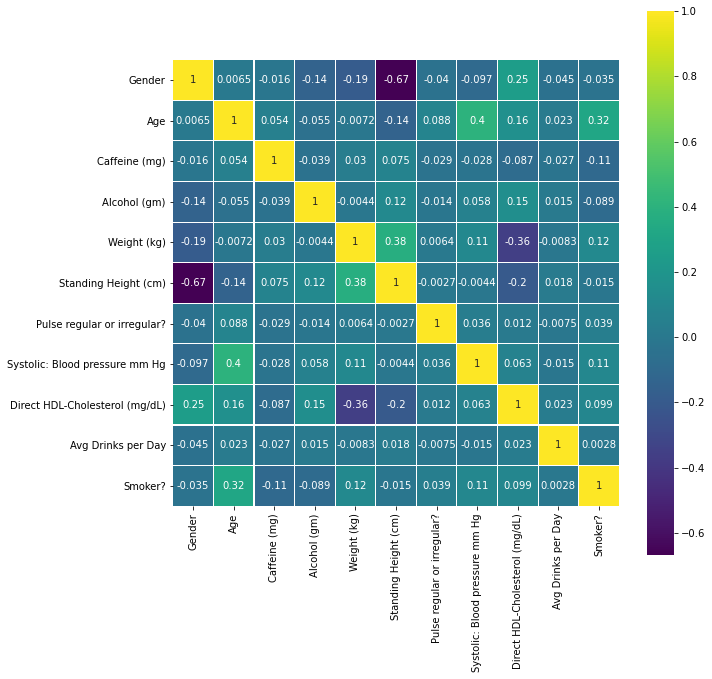

In [23]:
#Correlation heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(nahnes_na.astype(float).drop(axis=1, labels='ID').corr(), 
            linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)